In [ ]:
import pandas as pd
spotify = pd.read_csv('/content/drive/MyDrive/Spotify.csv')
spotify

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [ ]:
spotifyN1 = spotify[spotify['Position']==1]

In [ ]:
spotifyN1['Region'].unique()

array(['ec', 'fr', 'ar', 'fi', 'no', 'it', 'lt', 'ph', 'tw', 'nz', 'ee',
       'tr', 'us', 'sv', 'cr', 'de', 'cl', 'jp', 'br', 'hn', 'gt', 'ch',
       'hu', 'ca', 'pe', 'be', 'my', 'dk', 'bo', 'pl', 'at', 'pt', 'se',
       'mx', 'pa', 'uy', 'is', 'es', 'cz', 'ie', 'nl', 'sk', 'co', 'sg',
       'id', 'do', 'lu', 'gb', 'global', 'py', 'au', 'lv', 'gr', 'hk'],
      dtype=object)

In [ ]:
paisesConMasReproducciones = list(spotifyN1.groupby('Region').sum().reset_index().sort_values('Streams',ascending = False).head(11)['Region'])
paisesConMasReproducciones

['global', 'us', 'gb', 'mx', 'de', 'br', 'es', 'se', 'nl', 'ar', 'ca']

In [ ]:
paisesConMasReproducciones.remove('global')
paisesConMasReproducciones

['us', 'gb', 'mx', 'de', 'br', 'es', 'se', 'nl', 'ar', 'ca']

In [ ]:
import matplotlib.pyplot as plt #Pylplot te permite hacer cosas sencillas
import seaborn as sns #Seaborn ter permite hacer cosas mas chetas

Text(0, 0.5, 'Cantidad de Streams promedio')

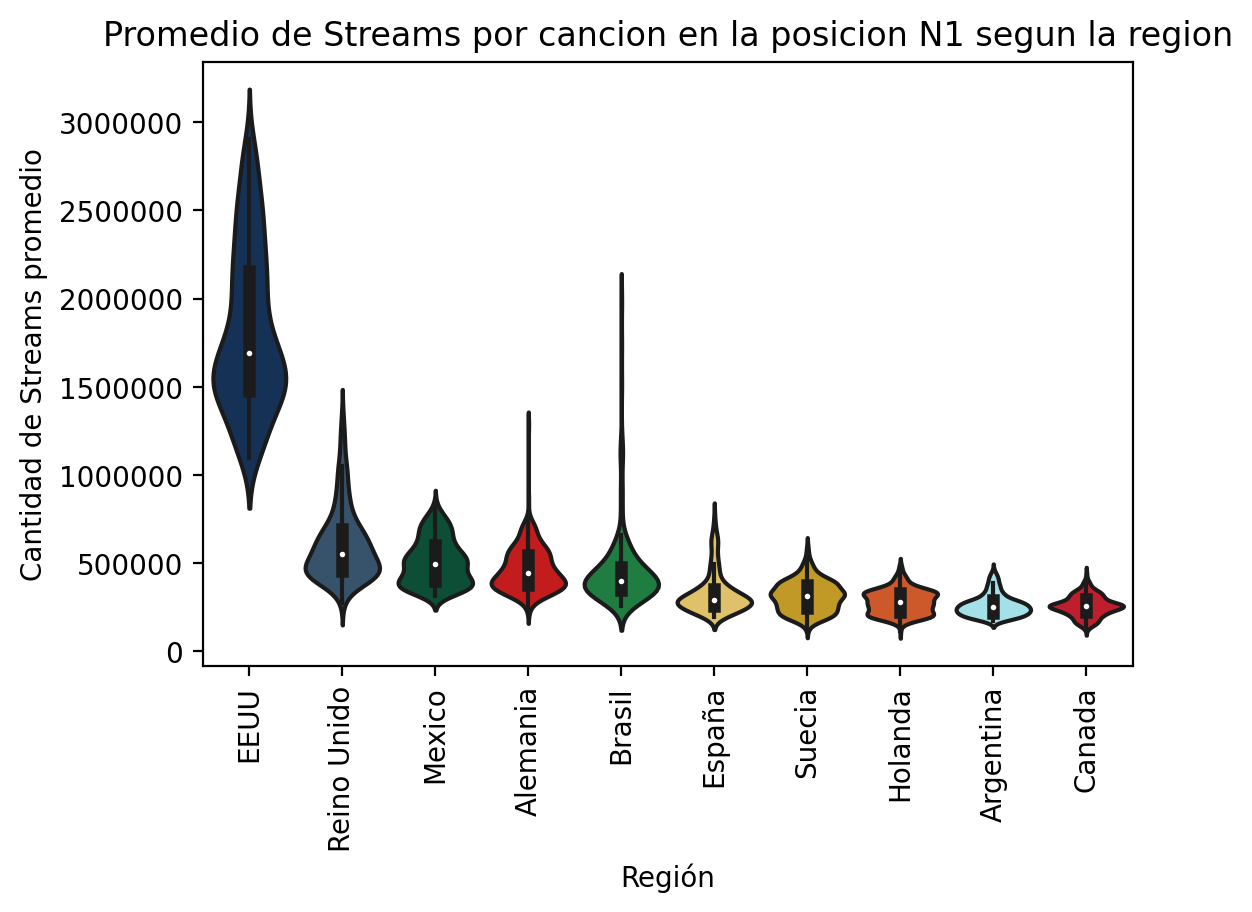

In [ ]:
plt.figure(dpi=200)
sns.violinplot(data=spotifyN1[(spotifyN1['Region'].isin(paisesConMasReproducciones)&(spotifyN1['Streams']<3000000))], y="Streams",x='Region',scale="count",order=paisesConMasReproducciones,palette=['#0A3161','#2F5373','#025939','#DE0000','#118C3C','#F2CB57','#D9A60D','#E84E0F','#99E9F2','#D90416']) #Pongo el filtro de <3000000 para eliminar algunos valores que no me interesaban de la region EEUU para que se vea mejor el graifco
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0,1,2,3,4,5,6,7,8,9],['EEUU','Reino Unido','Mexico','Alemania','Brasil','España','Suecia','Holanda','Argentina','Canada'])
plt.xticks(rotation=90)
plt.title('Promedio de Streams por cancion en la posicion N1 segun la region')
plt.xlabel('Región')
plt.ylabel('Cantidad de Streams promedio')